In [2]:
# Importing necessary libraries
import pandas as pd
import numpy as np
from pandas import datetime
from matplotlib import pyplot as plt
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
from datetime import timedelta
from statsmodels.tsa.stattools import adfuller
from pandas.plotting import autocorrelation_plot
from statsmodels.graphics.tsaplots import plot_pacf

In [3]:
# Loading csv files to data frames
df1=pd.read_excel('Air Quality Parameters - MPCB (2018-19 March).xlsx',sheet_name=[0],parse_dates=['Date'])
df2=pd.read_excel('Air Quality Parameters - MPCB (2015-17).xlsx',sheet_name=[0],parse_dates=['Date'])
df3=pd.read_excel('Air Quality Parameters - MPCB (2012-14).xlsx',sheet_name=[1],parse_dates=['Date'])
df4=pd.read_excel('Air Quality Parameters - MPCB (2009-11).xlsx',sheet_name=[0],parse_dates=['Date'])
df5=pd.read_excel('Air Quality Parameters - MPCB (2006-08).xlsx',sheet_name=[0],parse_dates=['Date'])

In [4]:
# Concatenate all dataframes into single data frame
All_data=pd.concat([df1[0],df2[0],df3[1],df4[0],df5[0]],ignore_index=True,sort=True)
All_data

,AQI,CO2,CO2 µg/m3,Date,Location,NOx,Nox µg/m3,RSPM,RSPM µg/m3,SO2,SO2 µg/m3,SPM,Sr No,Sr.No.,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 5,Unnamed: 9
0,213.0,NaN,NaN,2018-02-01,MPCB-BSRI,NaN,87,NaN,263.0,NaN,49,376.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN
1,173.0,NaN,NaN,2018-05-01,MPCB-BSRI,NaN,81,NaN,209.0,NaN,38,467.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN
2,167.0,NaN,NaN,2018-09-01,MPCB-BSRI,NaN,77,NaN,201.0,NaN,34,305.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN
3,143.0,NaN,NaN,2018-12-01,MPCB-BSRI,NaN,81,NaN,165.0,NaN,42,255.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN
4,164.0,NaN,NaN,2018-01-16,MPCB-BSRI,NaN,79,NaN,196.0,NaN,38,297.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9860,137.0,NaN,NaN,2008-12-26,MPCB-PMPR,NaN,31,NaN,155.0,NaN,18,NaN,NaN,2016.0,NaN,NaN,NaN,NaN,NaN
9861,165.0,NaN,NaN,2008-12-28,MPCB-PMPR,NaN,34,NaN,198.0,NaN,24,NaN,NaN,2017.0,NaN,NaN,NaN,NaN,NaN
9862,164.0,NaN,NaN,2008-12-29,MPCB-PMPR,NaN,45,NaN,196.0,NaN,19,NaN,NaN,2018.0,NaN,NaN,NaN,NaN,NaN
9863,159.0,NaN,NaN,2008-12-30,MPCB-PMPR,NaN,45,NaN,188.0,NaN,19,NaN,NaN,2019.0,NaN,NaN,NaN,NaN,NaN


In [5]:
# Segregate 'AQI','Date'& 'Location' to a different data frame
temp_df=All_data.loc[:,['AQI','Date','Location']]

In [6]:
# Set Date column as index
temp_df.set_index('Date',drop=True,inplace=True)

In [7]:
# Shape of data frame
temp_df.shape

(9865, 2)

In [8]:
temp_df.head()

,AQI,Location
Date,,
2018-02-01,213.0,MPCB-BSRI
2018-05-01,173.0,MPCB-BSRI
2018-09-01,167.0,MPCB-BSRI
2018-12-01,143.0,MPCB-BSRI
2018-01-16,164.0,MPCB-BSRI


In [9]:
#  How many observations are there from each Location
obs={}
for i in temp_df.Location.unique():
    obs[i]=temp_df[temp_df.Location==i].shape[0]
del obs[np.nan]
obs

{'MPCB-BSRI': 622,
 'MPCB-KR': 1825,
 'MPCB-NS': 707,
 'MPCB-PMPR': 1162,
 'MPCB-SWGT': 604,
 'Karve Road': 2069,
 'Nal Stop': 575,
 'Swargate': 587,
 'Bhosari': 605,
 'Pimpri': 254,
 'Pimpri Chinchwad': 854}

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10], <a list of 11 Text xticklabel objects>)

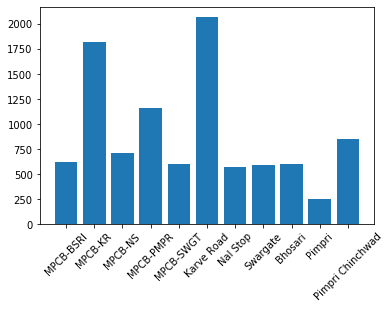

In [10]:
plt.bar(obs.keys(),obs.values())
plt.xticks(rotation=45)

# Because there is too much difference between 'no of observations from different locations', we can not pivot the table(creating a new data frame in which locations are the name of columns and rows having 'AQI values' corresponding to index(Date)). if we do so, there will be so many NAs so we will drop Location also and treat data as mean 'AQI' of whole city

In [11]:
# Drop 'Location'
temp_df.drop(['Location'],axis=1,inplace=True)
temp_df

,AQI
Date,
2018-02-01,213.0
2018-05-01,173.0
2018-09-01,167.0
2018-12-01,143.0
2018-01-16,164.0
...,...
2008-12-26,137.0
2008-12-28,165.0
2008-12-29,164.0


# we have data from different locations thats why repeating indexes are there

In [12]:
#  remove repeated indexes by grouping and using average value for each individual day
temp_df=temp_df.groupby(temp_df.index).mean()
temp_df

,AQI
Date,
2006-01-01,128.000000
2006-01-02,133.000000
2006-01-03,146.000000
2006-01-05,129.000000
2006-01-06,69.000000
...,...
2019-11-02,130.333333
2019-11-03,142.500000
2019-12-01,141.000000


# There could be some dates missing

In [13]:
# create a 'series of dates' from 'minimum date' to 'maximum date' found in our data
time_s=pd.date_range(start=temp_df.index.min(),end=temp_df.index.max(),freq='D')
len(time_s)

5085

In [14]:
# use this series as index 
main_df=temp_df.reindex(time_s)

In [15]:
main_df

,AQI
2006-01-01,128.000000
2006-01-02,133.000000
2006-01-03,146.000000
2006-01-04,NaN
2006-01-05,129.000000
...,...
2019-11-29,NaN
2019-11-30,NaN
2019-12-01,141.000000
2019-12-02,149.333333


# Handeling NAs

In [16]:
# how many NAs are there
p=len(main_df[main_df.AQI.isna()])*100/len(main_df)
p=round(p,2)
print(p,'% NA values are there in the data_set')

6.59 % NA values are there in the data_set


Total NAs :  335
2019 : 255


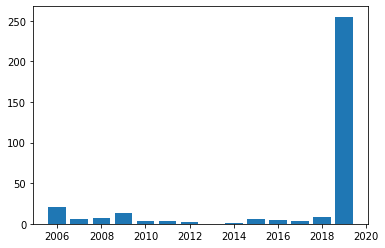

In [17]:
#  Count of NAs in each perticular year
NAs={}
nulls=main_df[main_df.AQI.isna()]
for y in nulls.index.year.unique():
    NAs[y]=nulls[str(y)].shape[0]
print('Total NAs : ',main_df[main_df.AQI.isnull()].shape[0])
plt.bar(NAs.keys(),NAs.values())
print(max(NAs),':',NAs[max(NAs)])

# Because 2019 has 255 NAs we can not use it

In [18]:
# Drop 2019's data from data frame
main_df.drop(main_df['2019'].index,inplace=True)
main_df.shape

(4748, 1)

In [19]:
#  how many NAs are there
p=len(main_df[main_df.AQI.isna()])*100/len(main_df)
p=round(p,2)
print(p,'% NA values are there in the data_set')

1.68 % NA values are there in the data_set


In [20]:
# Data frame having null values and their indexes
nulls=main_df[main_df.AQI.isna()]
nulls

,AQI
2006-01-04,NaN
2006-01-07,NaN
2006-01-10,NaN
2006-01-25,NaN
2006-02-10,NaN
...,...
2018-06-05,NaN
2018-10-18,NaN
2018-10-21,NaN
2018-11-17,NaN


In [21]:
# Cheching if the NAs are continues(time difference between current NA observation and previous NA observation==1)
d=timedelta(days=1)
diffr={}
for i in range(1,len(nulls.index)):
     if (nulls.index[i]-nulls.index[i-1])==d:
        diffr[nulls.index[i]]=nulls.index[i]-nulls.index[i-1]
diffr

{Timestamp('2015-03-29 00:00:00'): Timedelta('1 days 00:00:00'),
 Timestamp('2016-08-15 00:00:00'): Timedelta('1 days 00:00:00'),
 Timestamp('2018-11-18 00:00:00'): Timedelta('1 days 00:00:00')}


# We have found 3 such kind of NA values where Previous Day's value is also NA.

In [22]:
# we are setting window as 3 and minimum periods as 1 and creating a series of rolling averages
rollAvg=main_df.AQI.rolling(window=3,min_periods=1,center=True).mean()
any(rollAvg.isnull())

False

In [23]:
main_df.head()

,AQI
2006-01-01,128.0
2006-01-02,133.0
2006-01-03,146.0
2006-01-04,NaN
2006-01-05,129.0


In [24]:
# Replace NAs with corresponding rolling average
for i in nulls.index:
    main_df.loc[i,]=rollAvg.loc[i,]

In [25]:
main_df.head()

,AQI
2006-01-01,128.0
2006-01-02,133.0
2006-01-03,146.0
2006-01-04,137.5
2006-01-05,129.0


In [26]:
main_df.isna()

,AQI
2006-01-01,False
2006-01-02,False
2006-01-03,False
2006-01-04,False
2006-01-05,False
...,...
2018-12-27,False
2018-12-28,False
2018-12-29,False
2018-12-30,False


In [27]:
# Save this file as "Cleaned.csv"
main_df.to_csv('Cleaned.csv')

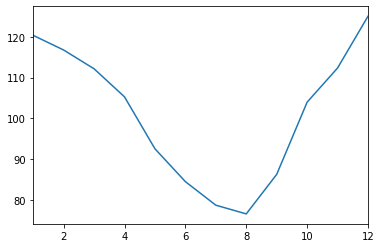

In [28]:
main_df.AQI.groupby(main_df.index.month).mean().plot()

# Every year in july, august and september  pune's air is more pure compared to other months

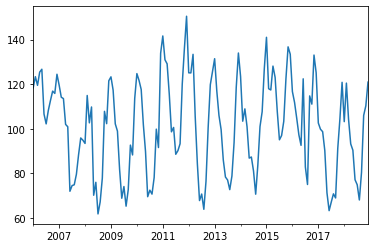

In [29]:
main_df.AQI.resample('m').mean().plot()

In [30]:
# Dickey-Fuller test to chek seasonality
adfuller(main_df.AQI)

(-3.76112266003766,
 0.003331089351919321,
 32,
 4715,
 {'1%': -3.4317376699258304,
  '5%': -2.862153191895276,
  '10%': -2.5670964041905022},
 44057.13465732174)

# ADF value is less than critical value at alfa=5% thus we reject H0 and we can conclude that time series is stationary

In [31]:
X = main_df.AQI

In [35]:
size = int(len(X) * 0.90)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]

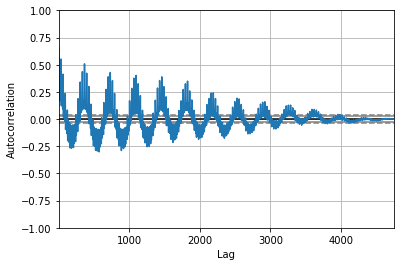

In [36]:
autocorrelation_plot(main_df.AQI)
plt.show()

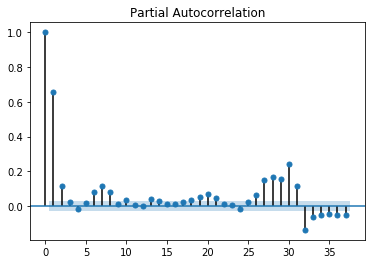

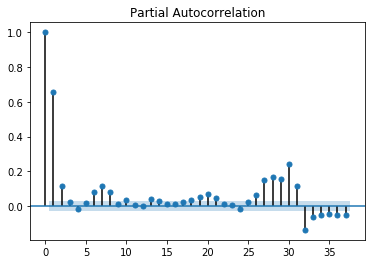

In [37]:
plot_pacf(main_df)

In [ ]:
predictions = list()
for t in range(len(test)):
	model = ARIMA(history, order=(5,0,1))
	model_fit = model.fit(disp=0)
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))

predicted=157.820417, expected=60.500000
predicted=91.304252, expected=68.000000


In [39]:
error = mean_squared_error(test, predictions)
print('Test RMSE: %.3f' % error)

Test RMSE: 578.441


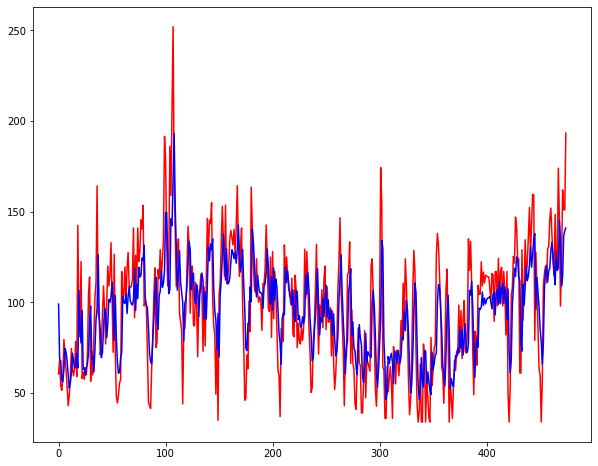

In [40]:
# plot
plt.gcf().set_size_inches(10,8)
plt.plot(test.values,color='red')
plt.plot(predictions, color='blue')
plt.show()